# Vizualized model

`ABSESpy` provides a basic visualization of the model. The visualization is based on the `matplotlib`, `xarray`, `geopandas`, and `networkx` library. The visualization is not perfect, but it can help to understand the model structure.

## Grid world

In [ ]:
from abses import MainModel

model = MainModel()

[14:33:13][WARNING][nature] the nature's CRS has been changed to epsg:4326.


In [ ]:
# Create a spatial module for actors
module = model.nature.create_module(shape=(50, 40), name="world")

<Axes: xlabel='test', ylabel='Count'>

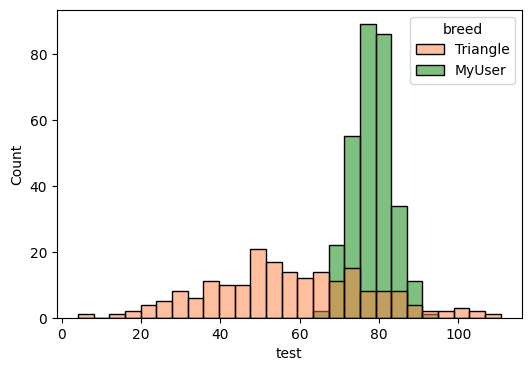

In [ ]:
from abses import Actor
import matplotlib.pyplot as plt
import seaborn as sns


class Triangle(Actor):
    color = "#FF7F3E"
    marker = "^"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(60, 20)


class MyUser(Actor):
    marker = "o"
    color = "green"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(78, 5)


new_agents = module.random.new(Triangle, size=200, replace=True)
new_users = module.random.new(MyUser, size=300, replace=True)

# Plot histogram of the 'test' attribute
values = model.actors.array("test")
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(values, bins=30, kde=False, ax=ax)
ax.set_title("Distribution of test attribute")
plt.show()

<Axes: xlabel='x', ylabel='y'>

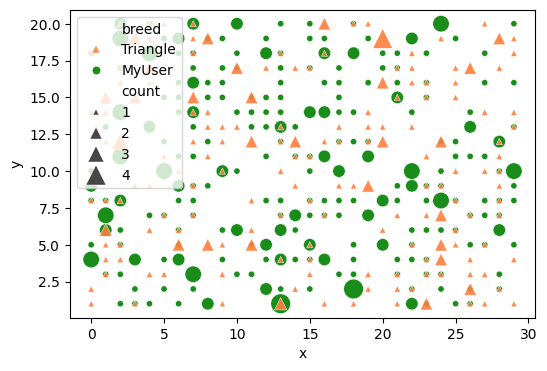

In [ ]:
# Scatter plot of actor positions by reading coordinates
import matplotlib.pyplot as plt
xs = [a.at.pos[0] for a in model.actors if hasattr(a.at, "pos")]
ys = [a.at.pos[1] for a in model.actors if hasattr(a.at, "pos")]
colors = [getattr(a.__class__, "color", "gray") for a in model.actors]
plt.figure(figsize=(6, 5))
plt.scatter(xs, ys, c=colors, alpha=0.9, s=20)
plt.title("Actor positions")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

## Real-world map

In this section, we will visualize the real-world map of the model.

[14:33:14][WARNING][nature] the nature's CRS has been changed to GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]].
/Users/songshgeo/Documents/VSCode/ABSESpy/abses/nature.py:170: UserWarning: Converting PatchModule from crs EPSG:4326 to the crs of BaseNature - EPSG:4326. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  self.add_layer(module)


<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

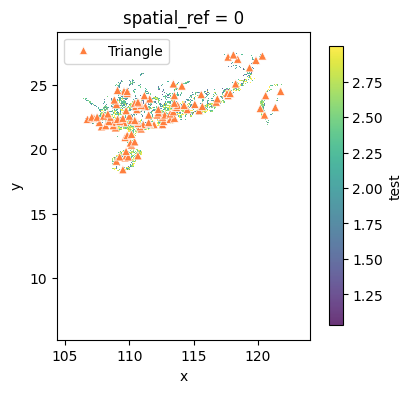

In [ ]:
from abses import MainModel
from abses import load_data

sc = MainModel()
cropland = sc.nature.create_module(
    how="from_file",
    raster_file=load_data("farmland.tif"),
    apply_raster=True,
    name="cropland",
    attr_name="test",
)

# adding some Triangle actors and then plotting
actors = cropland.random.new(Triangle, size=100)
from abses.viz.plotting import plot_raster
plot_raster(cropland, attr="test")

## Shapefile Dataset

`ABSESpy` allows user to create Geo- Agents from GeoDataFrame object.

In [5]:
from abses import load_data
import geopandas as gpd

data = gpd.read_file(load_data("YR_cities.zip"))
data.head()

City_ID     Ratio          area  Shaoefile_ Perfecture Province_n  \
0      100  0.546595   3958.281245       128.0       C100      Henan   
1      102  0.385113  15258.027194       170.0       C102      Henan   
2      106  0.567869   4273.313471       197.0       C106      Henan   
3      107  0.389969   9951.746614       215.0       C107      Henan   
4      109  0.601268   8279.739196       290.0       C109      Henan   

                                            geometry  
0  POLYGON ((113.38580 35.47040, 113.39200 35.464...  
1  POLYGON ((112.03220 35.04700, 112.03260 35.045...  
2  POLYGON ((115.19540 36.20580, 115.19700 36.203...  
3  POLYGON ((111.96140 35.07840, 111.96400 35.076...  
4  POLYGON ((113.67120 35.83740, 113.67660 35.835...

In [6]:
model2 = MainModel()
cities = model2.agents.new_from_gdf(
    data, unique_id="City_ID", attrs={"area": "area", "Province_n": "province"}
)
cities

<ActorsList: (59)Actor>

In [ ]:
# Plot cities using networkx from links or simply scatter centroids
import matplotlib.pyplot as plt

try:
    # If cities carry geometry, scatter centroids
    xs = [getattr(a, "geom").centroid.x for a in cities if hasattr(a, "geom")]
    ys = [getattr(a, "geom").centroid.y for a in cities if hasattr(a, "geom")]
    if xs and ys:
        plt.figure(figsize=(5,4))
        plt.scatter(xs, ys, s=20)
        plt.title("Cities (centroids)")
        plt.show()
    else:
        raise AttributeError
except Exception:
    # fallback to listing
    print(f"Loaded {len(cities)} city actors.")


<Axes: >

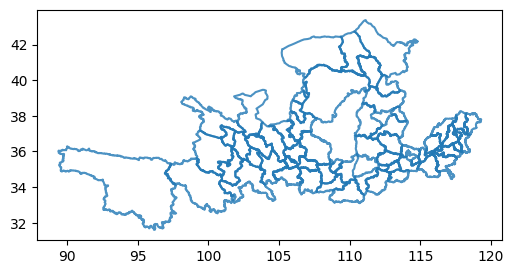

In [ ]:
# Already visualized above; show count as simple output
len(cities)